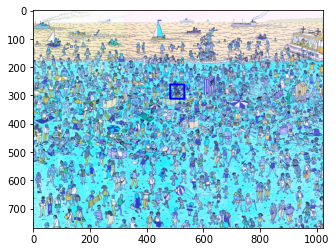

In [2]:
# Finding a template in the full image with matchTemplate function
# which returns array values of x, y for vertices of rectangle
import numpy as np
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt
import cv2
import cv2
import numpy as np

image = cv2.imread('img/WaldoBeach.jpg')
cv2.imshow("WALDO", image)
cv2.waitKey(0)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

template = cv2.imread("img/waldo.jpg", 0)
cv2.imshow("B", template)
cv2.waitKey(0)
result = cv2.matchTemplate(image_gray, template, cv2.TM_CCOEFF)
x1, y1, x2, y2 = cv2.minMaxLoc(result)

top_left = y2
bottom_right = (top_left[0]+50, top_left[1]+50)
cv2.rectangle(image, top_left, bottom_right, (0, 0, 255), 5)
cv2.imshow("edges", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(image)

In [13]:
# Template matching is not resilient in terms of many features
# rotations renders method ineffective
# size affects the result
# photometric changes such as brightness, contrast, hue
# distortions from view points; affine

# Thus we need to remember the features of the image - Feature Detection

In [14]:
# Corners are more important features than flat, or edge features
# Coz cornors are reacting to any change in all directions while flat or edges can react to only one or two dimensions
# |_|
# HoG is a feature descriptor, done by sliding window detector over an entire image

## Finding Corners - Harris Corner

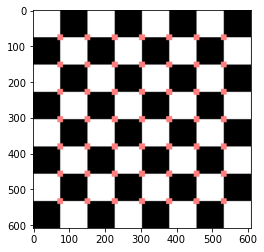

In [48]:
image = cv2.imread('img/chess.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

cv2.imshow('Harris Corners', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(image)

## Good Features To track

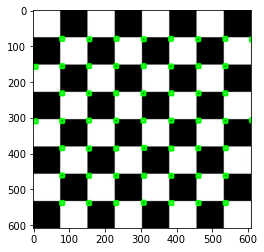

In [54]:
image = cv2.imread('img/chess.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 15)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(image, (x, y), (x+10, y+10), (0, 255, 0),5)
cv2.imshow('Harris Corners', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(image)

## Object Detection Classification

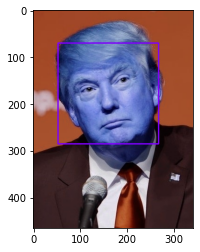

In [78]:
# Haar Cascade Classifier
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

image = cv2.imread('img/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
    print("No faces found")
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)  
cv2.destroyAllWindows()
plt.imshow(image)

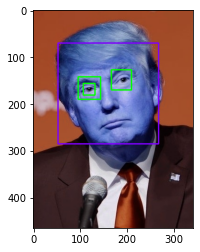

In [81]:
# Eye Classifier
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

image = cv2.imread('img/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
    print("No faces found")
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)  
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0),2)
        cv2.imshow("eye",image)
        cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(image)

In [ ]:
# Eye Classifier
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(input,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    return input

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow("face detector",detect_face(frame))
    cv2.waitKey(3000)

plt.imshow(image)
cap.release()
cv2.destroyAllWindows()
